# Recommandations avec un réseau de neuronnes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
data = pd.read_csv('dataset_movie_100k.csv')

In [3]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

n_users = len(data.user_id.unique())
n_books = len(data.book_id.unique())

latent=7

In [4]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1,latent , name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, latent, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error', metrics=['accuracy'])

model.summary()





__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Book-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
User-Input (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
Book-Embedding (Embedding)      (None, 1, 7)         63469       Book-Input[0][0]                 
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 7)         4704        User-Input[0][0]                 
__________________________________________________________________________________________________
Flatte

## on inspecte les indices des book_id

In [5]:
unique_book_id = list(set(data.book_id))
n_unique_books = len(unique_book_id)
print('il y a {} unique books'.format(n_unique_books))
print("l'indice max de book_id est {}".format(max(data.book_id)))

il y a 9066 unique books
l'indice max de book_id est 163949


### les indices n'allant pas de 0 a n_unique on doit les re-mapper

In [6]:
book_id_to_index = {book_id: ix for ix, book_id in enumerate(unique_book_id)}

In [7]:
data['book_id_mapped'] = data['book_id'].apply(lambda book_id: book_id_to_index[book_id] )
train['book_id_mapped'] = train['book_id'].apply(lambda book_id: book_id_to_index[book_id] )
test['book_id_mapped'] = test['book_id'].apply(lambda book_id: book_id_to_index[book_id] )


C:\Users\danbe\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\danbe\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## on inspecte les indices des user_id

In [8]:
unique_user_id = list(set(train.user_id))
n_unique_books = len(unique_user_id)
print('il y a {} unique books'.format(n_unique_books))
print("l'indice max de user_id est {}".format(max(train.user_id)))

il y a 671 unique books
l'indice max de user_id est 671


In [9]:
history = model.fit([list(train.user_id), list(train.book_id_mapped)], train.rating, epochs=10, verbose=2, validation_split=.2, )



Train on 64002 samples, validate on 16001 samples
Epoch 1/10
 - 6s - loss: 12.8085 - acc: 0.0020 - val_loss: 9.7666 - val_acc: 0.0143
Epoch 2/10
 - 5s - loss: 6.1464 - acc: 0.0698 - val_loss: 4.1228 - val_acc: 0.1233
Epoch 3/10
 - 4s - loss: 3.0293 - acc: 0.1675 - val_loss: 2.6544 - val_acc: 0.1923
Epoch 4/10
 - 5s - loss: 1.9900 - acc: 0.2333 - val_loss: 2.0175 - val_acc: 0.2452
Epoch 5/10
 - 4s - loss: 1.4944 - acc: 0.2763 - val_loss: 1.7023 - val_acc: 0.2765
Epoch 6/10
 - 4s - loss: 1.2202 - acc: 0.3024 - val_loss: 1.5306 - val_acc: 0.2935
Epoch 7/10
 - 5s - loss: 1.0540 - acc: 0.3147 - val_loss: 1.4293 - val_acc: 0.3038
Epoch 8/10
 - 5s - loss: 0.9468 - acc: 0.3273 - val_loss: 1.3685 - val_acc: 0.3110
Epoch 9/10
 - 5s - loss: 0.8739 - acc: 0.3347 - val_loss: 1.3293 - val_acc: 0.3105
Epoch 10/10
 - 5s - loss: 0.8212 - acc: 0.3391 - val_loss: 1.3032 - val_acc: 0.3106


Text(0, 0.5, 'Erreur Quadratique Moyenne')

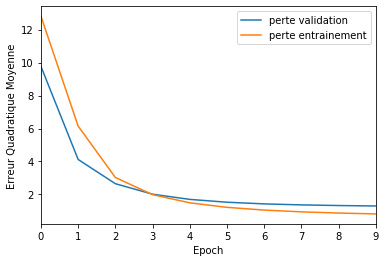

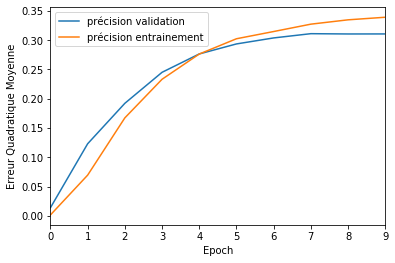

In [10]:
traque = pd.DataFrame(history.history)
traque.columns=['perte validation','précision validation','perte entrainement', 'précision entrainement']
traque[['perte validation','perte entrainement']].plot()
plt.xlabel('Epoch')
plt.ylabel('Erreur Quadratique Moyenne')
traque[['précision validation','précision entrainement']].plot()
plt.xlabel('Epoch')
plt.ylabel('Erreur Quadratique Moyenne')

In [11]:
predictions = model.predict([train.user_id.head(20), train.book_id_mapped.head(20)])

for i in range(0,10):
    print(predictions[i], train.rating.iloc[i])

[3.4447484] 4.0
[3.4758081] 3.0
[3.3054328] 4.0
[3.5655084] 3.0
[2.3117692] 3.0
[3.6595595] 3.0
[3.1435695] 2.0
[2.3791072] 5.0
[4.2542233] 5.0
[4.2835655] 3.5


In [36]:
model.loss

'mean_squared_error'

In [13]:
traque[::2]

,perte validation,précision validation,perte entrainement,précision entrainement
0,9.766629,0.014312,12.808529,0.001969
2,2.654401,0.192300,3.029341,0.167479
4,1.702302,0.276483,1.494403,0.276335
6,1.429334,0.303794,1.053981,0.314709
8,1.329289,0.310543,0.873872,0.334661
